In [13]:
####Image Enhancement using Neighborhood Processing###
import cv2
import numpy as np
import random
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
from io import BytesIO
from PIL import Image
from google.colab import files
from skimage import color
from skimage import io
#uploaded = files.upload()
from PIL import ImageDraw
from PIL import ImageFont
from skimage.util import random_noise
figsize=(10,10)
#upload=files.upload()

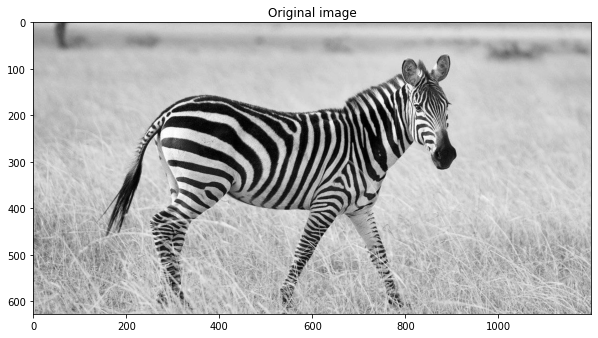

In [14]:
im=cv2.imread('Zebra.jpg')
img=cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
plt.figure(figsize=figsize)
plt.imshow(img,cmap="gray",vmin=0, vmax=256)
plt.title("Original image")
plt.show()

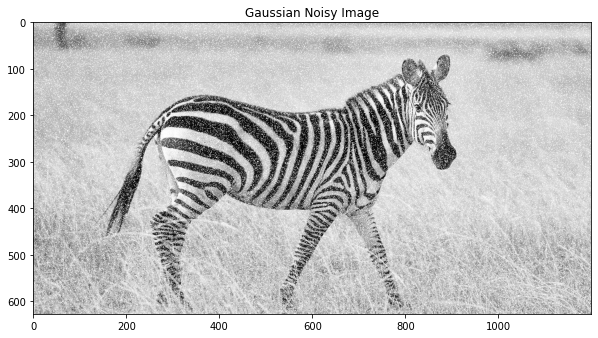

In [15]:
######Generate Gaussian noise for the image######
im1=cv2.imread('Zebra.jpg',0)
gauss = np.random.normal(0,1,im1.size)
gauss = gauss.reshape(im1.shape[0],im1.shape[1]).astype('uint8')
######Add the Gaussian noise to the image###### 
im2 = cv2.add(im1,gauss)
plt.figure(figsize=figsize)
plt.imshow(im2,cmap="gray",vmin=0, vmax=256)
plt.title("Gaussian Noisy Image")
plt.show()

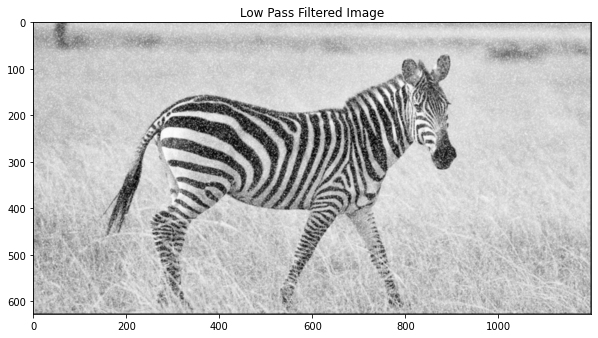

In [16]:
######Low Pass Filter Image######
#Generate Gussian noise
img1=cv2.imread('Zebra.jpg',0)
gauss = np.random.normal(0,1,img1.size)
gauss = gauss.reshape(img1.shape[0],img1.shape[1]).astype('uint8')
img= cv2.add(img1,gauss)
# Develop Averaging filter(3, 3) mask 
m=img.shape[0]
n=img.shape[1]
mask = np.ones([3, 3], dtype = int)
mask = mask / 9 
img_new=np.zeros([m,n])
for i in range (1,m-1):
  for j in range(1,n-1):
    temp=img[i-1,j-1]*mask[0,0]+img[i-1,j]*mask[0,1]+img[i-1,j+1]*mask[0,2]+img[i,j-1]*mask[1,0]+img[i,j]*mask[1,1]+img[i,j+1]*mask[1,2]+img[i+1,j-1]*mask[2,0]+img[i+1,j]*mask[2,1]+img[i+1,j+1]*mask[2,2]
    img_new[i,j]=temp
    img_new=img_new.astype(np.uint8) 
plt.figure(figsize=figsize)
plt.imshow(img_new,cmap="gray",vmin=0,vmax=256)
plt.title("Low Pass Filtered Image")
plt.show()

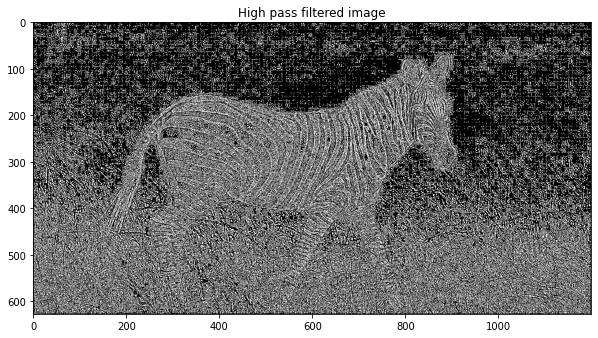

In [17]:
######High Pass Filtered Image######
img1=cv2.imread('Zebra.jpg',0)
m= img1.shape[0]
n= img1.shape[1]
#Develop Averaging filter(3, 3) mask 
mask = np.array([[-1,-1,-1],[-1,8,-1],[-1,-1,-1]])
mask = mask / 9 
img_new=np.zeros([m,n])
for i in range (1,m-1):
  for j in range(1,n-1):
    temp=img1[i-1, j-1]*mask[0,0]+img1[i-1,j]*mask[0,1]+img1[i-1,j+1]*mask[0,2]+img1[i,j-1]*mask[1,0]+img1[i,j]*mask[1,1]+img1[i,j+1]*mask[1,2]+img1[i+1,j-1]*mask[2,0]+img1[i+1,j]*mask[2,1]+img1[i+1,j+1]*mask[2,2]
    img_new[i,j]=temp
    img_new=img_new.astype(np.uint8)
plt.figure(figsize=figsize)
plt.imshow(img_new,cmap="gray",vmin=0, vmax=256)
plt.title("High pass filtered image")
plt.show()


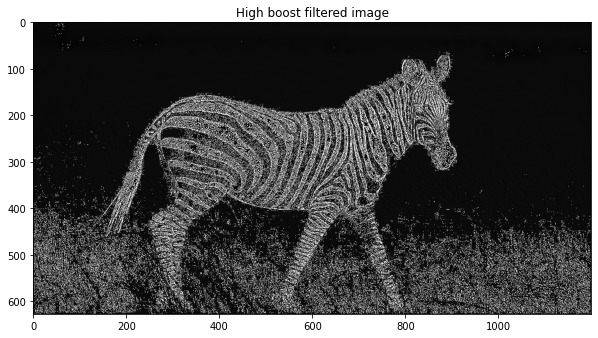

In [18]:
######High Boost Filtered Image######
img=cv2.imread('Zebra.jpg',0)
m= img.shape[0]
n= img.shape[1]
#Develop Averaging filter(3, 3) mask 
mask = np.array([[-1,-1,-1],[-1,8.5,-1],[-1,-1,-1]])
mask = mask / 9 
img_new=np.zeros([m,n])
for i in range (1,m-1):
  for j in range(1,n-1):
    temp=img[i-1,j-1]*mask[0,0]+img[i-1,j]*mask[0,1]+img[i-1,j+1]*mask[0,2]+img[i,j-1]*mask[1,0]+img[i,j]*mask[1,1]+img[i,j+1]*mask[1,2]+img[i+1,j-1]*mask[2,0]+img[i+1,j]*mask[2,1]+img[i+1,j+1]*mask[2,2]
    img_new[i,j]=temp
    img_new=img_new.astype(np.uint8)
plt.figure(figsize=figsize)
plt.imshow(img_new,cmap="gray",vmin=0, vmax=256)
plt.title("High boost filtered image")
plt.show()

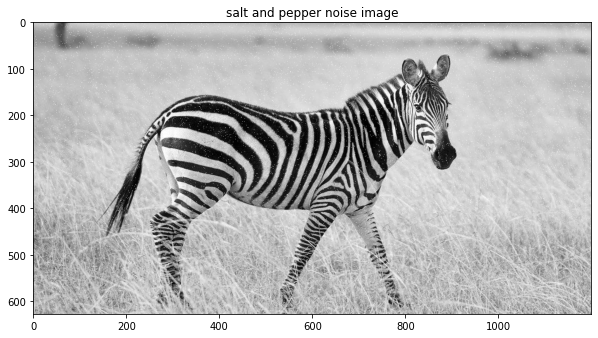

In [19]:
######Function For Salt and Pepper Noise######
def add_noise (img):
  #Getting the dimensions of the image
  row,col=img.shape
  #randomly pick some pixels in the image for coloring them white
  #pick a random number between300 and 10000
  numbers_of_pixels=random.randint(300,10000)
  for i in range(numbers_of_pixels):
    #pick a random y coordinate
    y_coord=random.randint(0,row-1)
    #pick a random x coordinate
    x_coord=random.randint(0,col-1)
    #color the pixels to white
    img[y_coord][x_coord]=255
  #randomly pick some pixels in the image for coloring them black
  #pick a random number between300 and 10000
  numbers_of_pixels=random.randint(300,10000)
  for i in range(numbers_of_pixels):
    #pick a random y coordinate
    y_coord=random.randint(0,row-1)
    #pick a random x coordinate
    x_coord=random.randint(0,col-1)
    #color the pixels to black
    img[y_coord][x_coord]=255
  return img
# salt-and-pepper noise can be applied only to grayscale images
# Reading the color image in grayscale image
img = cv2.imread('Zebra.jpg',cv2.IMREAD_GRAYSCALE)
#Storing the image
img_new1=add_noise(img)
plt.figure(figsize=figsize)
plt.imshow(img_new1,cmap="gray",vmin=0, vmax=256)
plt.title("salt and pepper noise image")
plt.show()

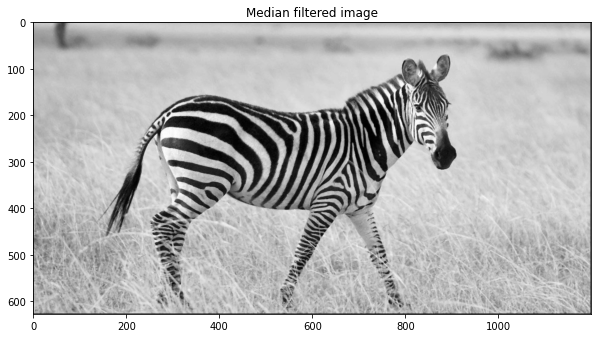

In [20]:
######Median Filter######
img_noisy1 = img_new1
m= img_noisy1.shape[0]
n= img_noisy1.shape[1]
# Traverse the image. For every 3X3 area,
# find the median of the pixels and
# replace the center pixel by the median
img_new2 = np.zeros([m, n])
for i in range(1, m-1):
    for j in range(1, n-1):
        temp = [img_noisy1[i-1,j-1],img_noisy1[i-1,j],img_noisy1[i-1,j+1],
                img_noisy1[i,j-1],img_noisy1[i,j],img_noisy1[i,j+1],img_noisy1[i+1,j-1],
                img_noisy1[i+1,j],img_noisy1[i+1,j+1]]
        temp = sorted(temp)
        img_new2[i,j]= temp[4]
        img_new2 = img_new2.astype(np.uint8)
plt.figure(figsize=figsize)
plt.imshow(img_new2,cmap="gray",vmin=0, vmax=256)
plt.title("Median filtered image")
plt.show()

In [21]:
%%capture
!wget -nc https://raw.githubusercontent.com/brpy/colab-pdf/master/colab_pdf.py
from colab_pdf  import colab_pdf
colab_pdf("Exp4 (filtered).ipynb")